In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the Excel file
file_path = '../data/raw/PSP_Jan_Feb_2019.xlsx'
df = pd.read_excel(file_path)

# Data specification

In [2]:
# Display the first few rows of the dataframe
df.head()

,index,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


* Index
* tmsp: timestamp of the transaction.
* country: Country of origin of the transaction.
* amount: Amount of the transaction.
* success: success of the transaction (1 for success, 0 for failure).
* PSP: Payment Service Provider
* 3D_secured: Whether the transaction is 3D secured (1 for yes, 0 for no).
* card: Card type.

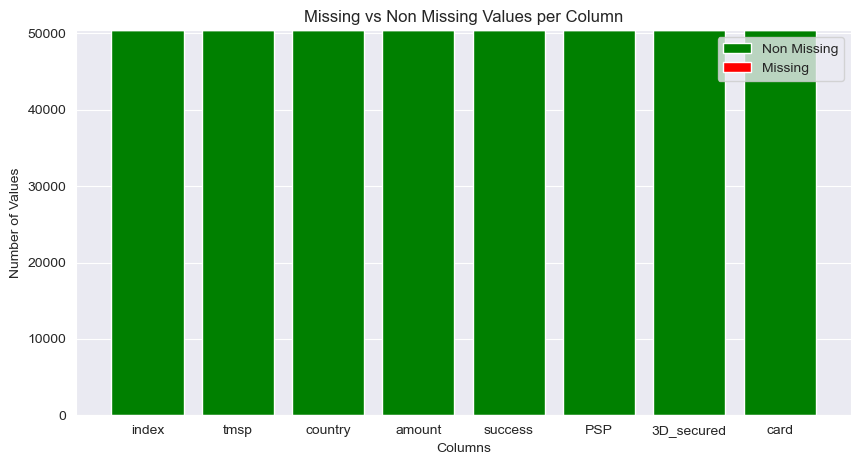

index         0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


In [3]:
# Check for missing values and data types
missing_values = df.isnull().sum()
non_missing_values = df.count()
data_types = df.dtypes

# Create graph for missing and non-missing values
plt.figure(figsize=(10, 5))

# Stacking the bars for "missing" and "not missing" values
plt.bar(missing_values.index, non_missing_values, color='green', label='Non Missing')
plt.bar(missing_values.index, missing_values, color='red', label='Missing', bottom=non_missing_values)

plt.title('Missing vs Non Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.legend()

plt.show()

print(missing_values)

In [4]:
df.describe()

,index,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000,50410.000000
mean,25204.500000,202.395715,0.202896,0.238266
std,14552.257872,96.274730,0.402160,0.426027
min,0.000000,6.000000,0.000000,0.000000
25%,12602.250000,133.000000,0.000000,0.000000
50%,25204.500000,201.000000,0.000000,0.000000
75%,37806.750000,269.000000,0.000000,0.000000
max,50409.000000,630.000000,1.000000,1.000000


# Visualisation of the variables

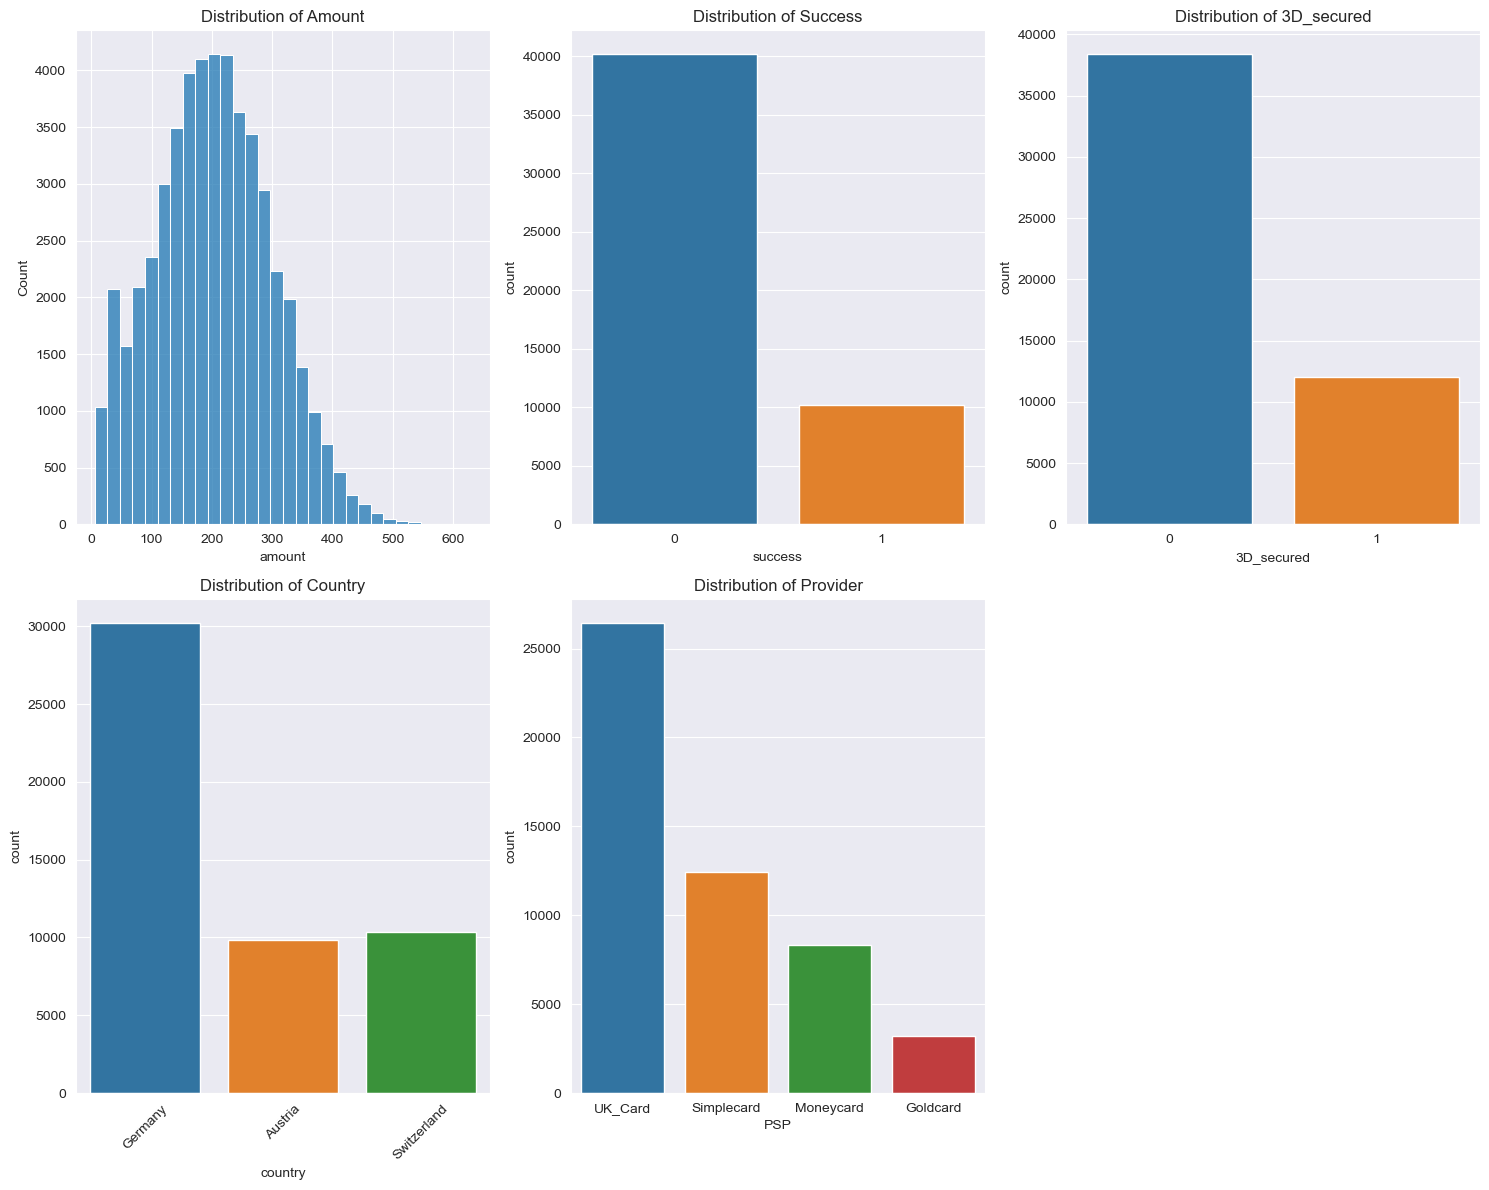

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Plotting the distribution of numerical variables
plt.subplot(2, 3, 1)
sns.histplot(df['amount'], kde=False, bins=30)
plt.title('Distribution of Amount')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='success')
plt.title('Distribution of Success')

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='3D_secured')
plt.title('Distribution of 3D_secured')

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='country')
plt.title('Distribution of Country')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='PSP')
plt.title('Distribution of Provider')

plt.tight_layout()
plt.show()


## Visualisation of outliers

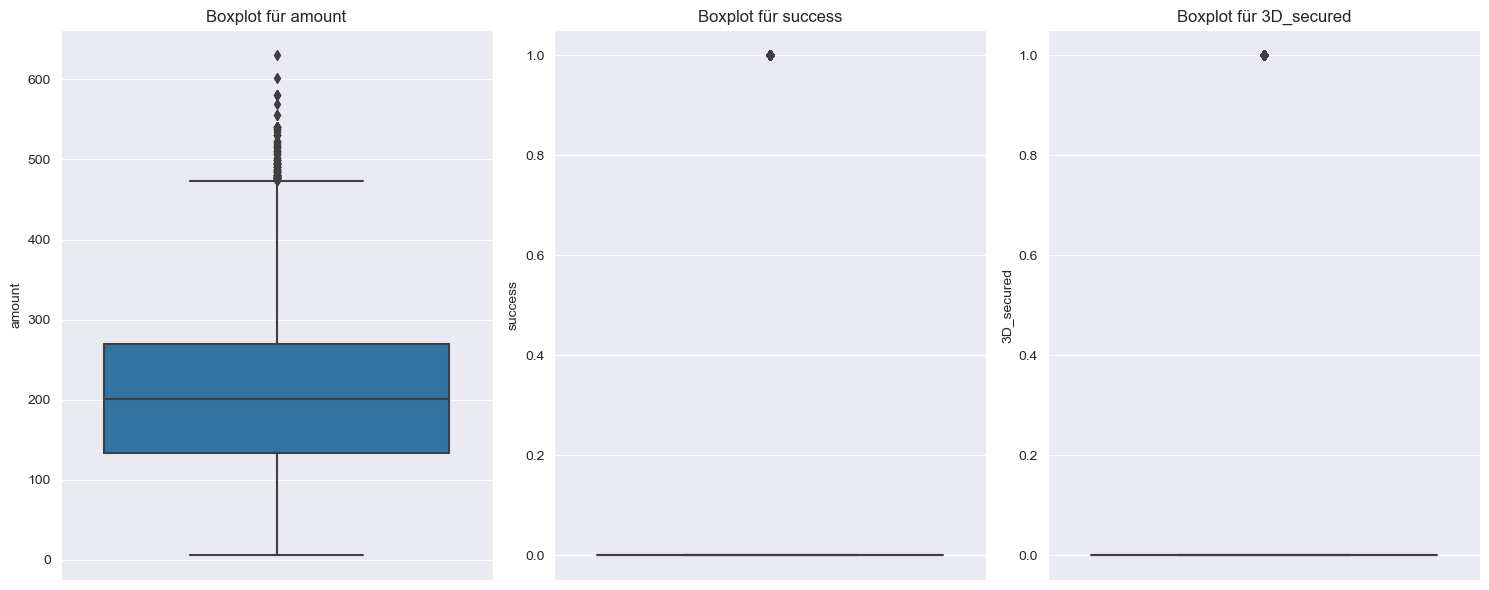

In [6]:
# Plot boxplots to identify outliers in numerical columns
numerical_columns = ['amount', 'success', '3D_secured']

plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot für {col}')

plt.tight_layout()
plt.show()


In [7]:
# Read fee data
fees_df_read = pd.read_excel('../data/raw/PSP_Fees.xlsx')
print(fees_df_read)

          PSP  success   fee
0   Moneycard        1   5.0
1    Goldcard        1  10.0
2     UK_Card        1   3.0
3  Simplecard        1   1.0
4   Moneycard        0   2.0
5    Goldcard        0   5.0
6     UK_Card        0   1.0
7  Simplecard        0   0.5


# Visualisation of the target variable success

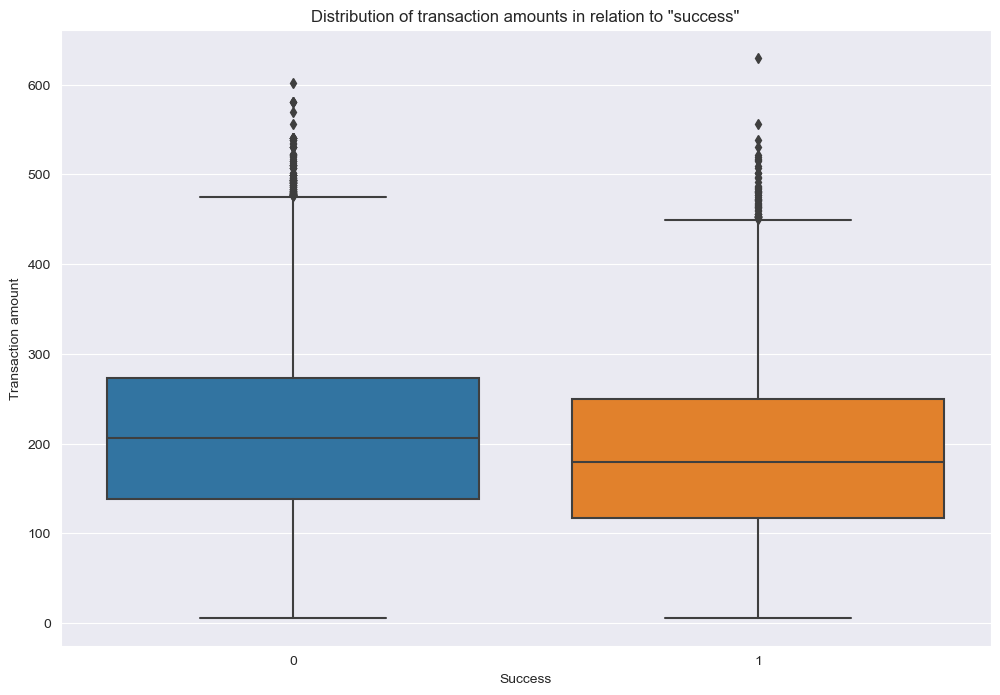

In [8]:
# Plot the distribution of 'amount' with respect to 'success'
plt.figure(figsize=(12, 8))
sns.boxplot(x='success', y='amount', data=df)
plt.title('Distribution of transaction amounts in relation to "success"')
plt.xlabel('Success')
plt.ylabel('Transaction amount')
plt.show()

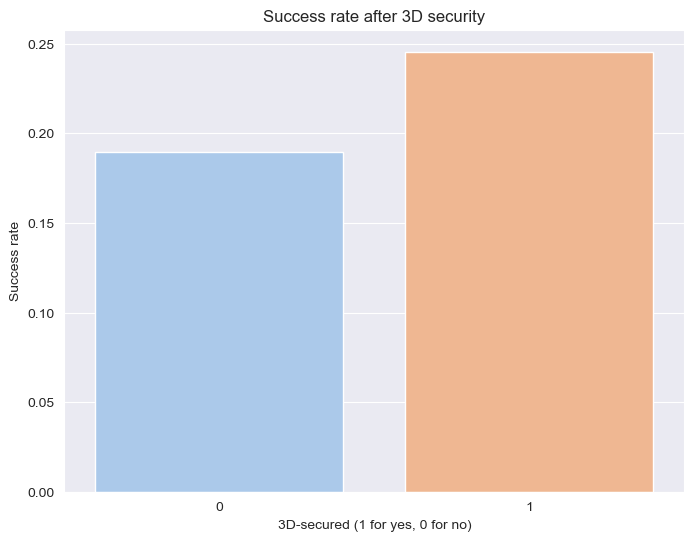

In [9]:
# Calculate the success rate by 3D security
success_rate_by_3d = df.groupby('3D_secured')['success'].mean().reset_index()

# Plot the success rate by 3D security
plt.figure(figsize=(8, 6))
sns.barplot(x='3D_secured', y='success', data=success_rate_by_3d, palette='pastel')
plt.title('Success rate after 3D security')
plt.xlabel('3D-secured (1 for yes, 0 for no)')
plt.ylabel('Success rate')
plt.show()

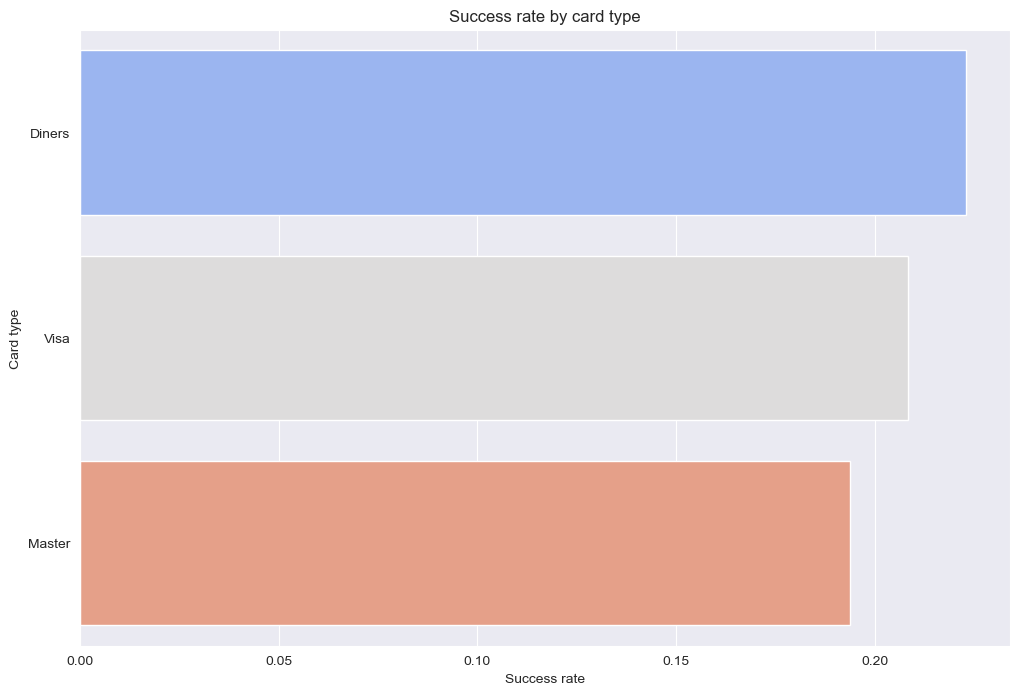

In [10]:
# Calculate the success rate by card type
success_rate_by_card = df.groupby('card')['success'].mean().reset_index().sort_values(by='success', ascending=False)

# Plot the success rate by card type
plt.figure(figsize=(12, 8))
sns.barplot(x='success', y='card', data=success_rate_by_card, palette='coolwarm')
plt.title('Success rate by card type')
plt.xlabel('Success rate')
plt.ylabel('Card type')
plt.show()

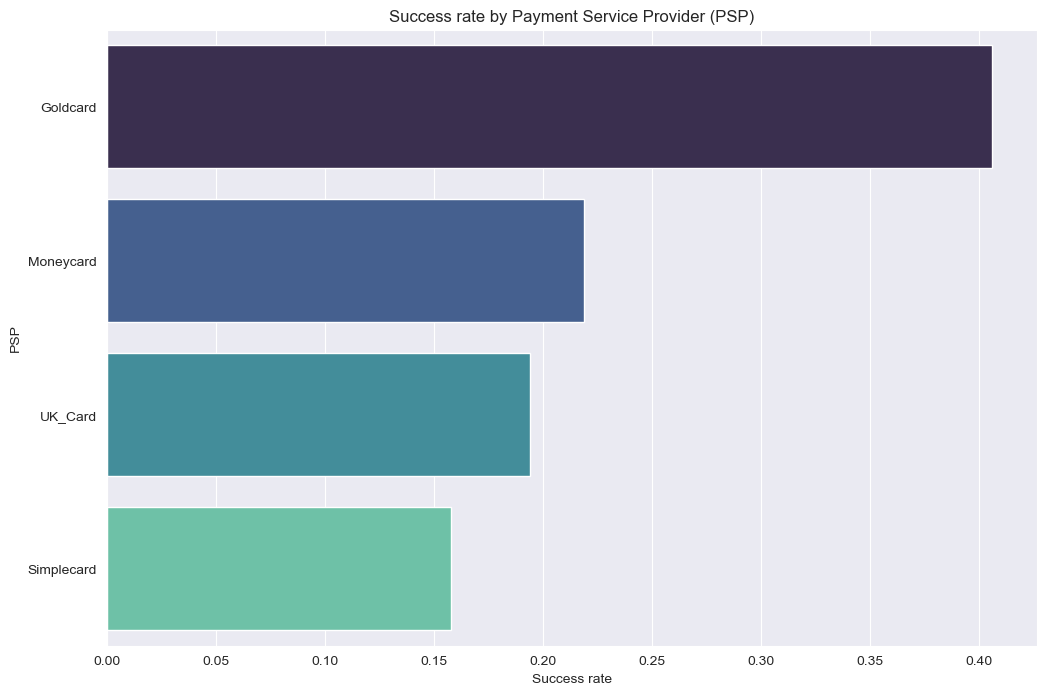

In [11]:
# Calculate the success rate by PSP
success_rate_by_psp = df.groupby('PSP')['success'].mean().reset_index().sort_values(by='success', ascending=False)

# Plot the success rate by PSP
plt.figure(figsize=(12, 8))
sns.barplot(x='success', y='PSP', data=success_rate_by_psp, palette='mako')
plt.title('Success rate by Payment Service Provider (PSP)')
plt.xlabel('Success rate')
plt.ylabel('PSP')
plt.show()

# History of the requests

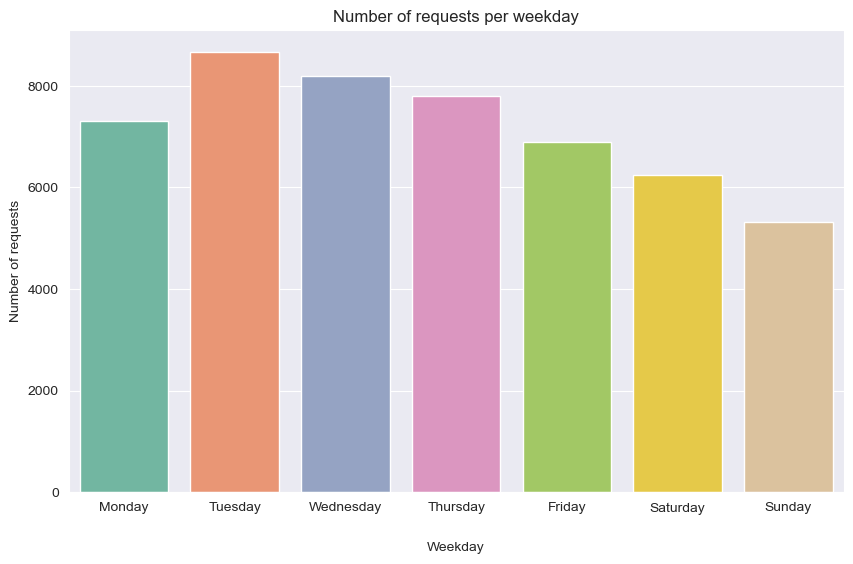

In [12]:
# Extract the weekday and week number from the 'tmsp' column
df['weekday'] = df['tmsp'].dt.weekday
df['week_number'] = df['tmsp'].dt.isocalendar().week

# Count the number of rows for each weekday
count_by_weekday = df['weekday'].value_counts().sort_index().reset_index()
count_by_weekday.columns = ['Weekday', 'Number of lines']
count_by_weekday['Weekday'] = count_by_weekday['Weekday'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

# Plot the number of rows by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='Number of lines', data=count_by_weekday, palette='Set2')
plt.title('Number of requests per weekday')
plt.xlabel('Weekday',  labelpad=20)
plt.ylabel('Number of requests')
plt.show()

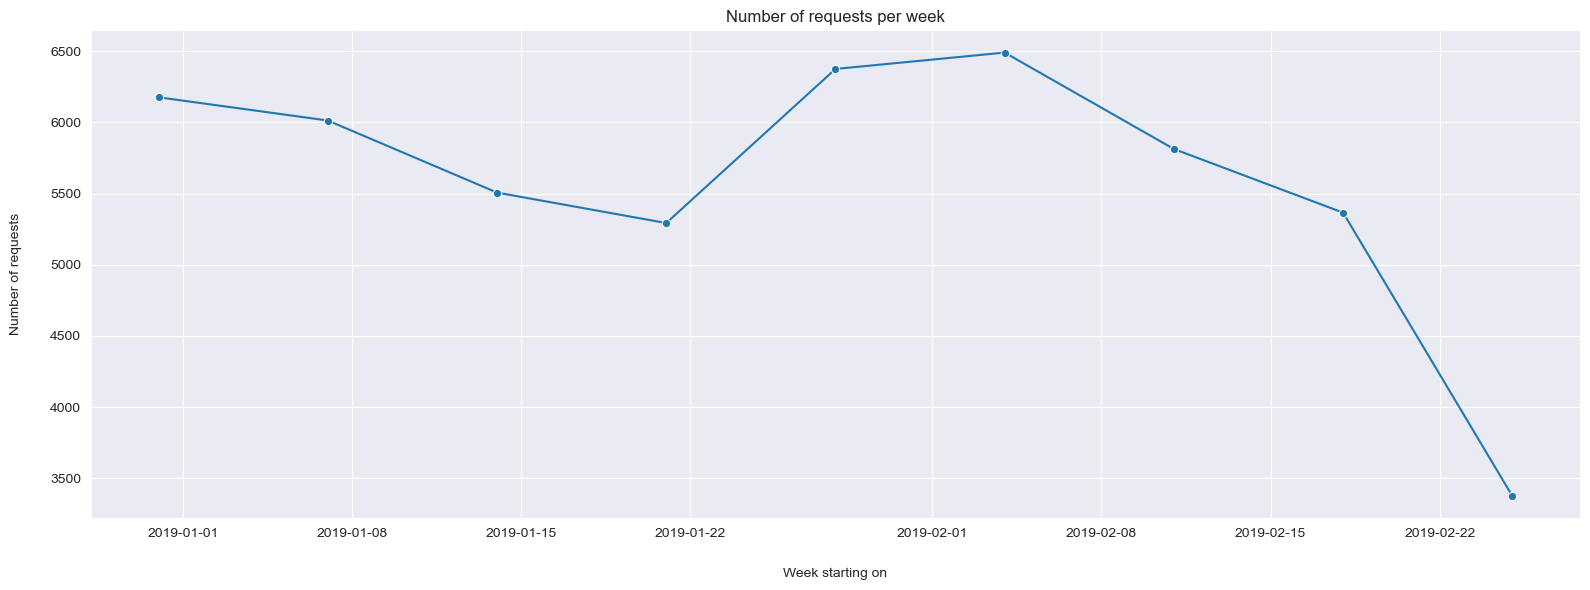

In [13]:
# Extract the week starting date (Monday) for each transaction
df['week_start_date'] = df['tmsp'].dt.to_period('W').dt.start_time

# Count the number of rows for each week start date
count_by_week_date = df['week_start_date'].value_counts().sort_index().reset_index()
count_by_week_date.columns = ['Week starting on', 'Number of lines']

# Plot the number of rows by week start date
plt.figure(figsize=(16, 6))
sns.lineplot(x='Week starting on', y='Number of lines', data=count_by_week_date, marker='o')
plt.title('Number of requests per week')
plt.xlabel('Week starting on', labelpad=20)
plt.ylabel('Number of requests', labelpad=20)
plt.tight_layout()
plt.show()